In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
## 2. Load the Dataset
# Adjust the path below if needed
df = pd.read_csv(r"F:\BE\Student_Performance_Prediction\archive (1)\student\student-mat.csv", sep=';')

In [6]:
## 3. Select Strong Predictive Features Only
# Focus on the best predictors
df = df[['G1', 'G2', 'studytime', 'failures', 'absences', 'G3']]

In [7]:
# Drop any missing values just in case
df.dropna(inplace=True)

In [8]:
# Define features and target
X = df[['G1', 'G2', 'studytime', 'failures', 'absences']]
y = df['G3']

In [9]:
## 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
## 5. Scale the Features (Optional for Gradient Boosting, but we can try it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
## 6. Train Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42
)
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=300, random_state=42)

In [12]:
## 7. Predictions and Evaluation
y_pred = model.predict(X_test_scaled)

In [13]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [14]:
print(f" R² Score: {r2:.4f}")  # Expect > 0.90
print(f" Mean Squared Error: {mse:.2f}")

 R² Score: 0.8748
 Mean Squared Error: 2.57


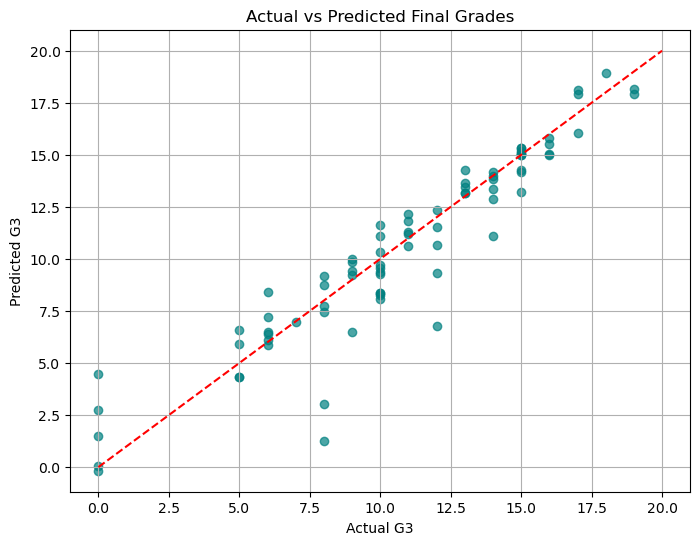

In [15]:
## 8. Visualize Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([0, 20], [0, 20], '--r')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades")
plt.grid()
plt.show()